<a href="https://colab.research.google.com/github/vishnuvmullapudi/LinkedIn-Job-Salary-Prediction/blob/main/Group_9_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS PROJECT GROUP 9

# Why we selected this data?
We have choosen  LinkedIn job postings 2023 data from Kaggle for our group project. We wanted the data to be relevant to real-time application which in future helps in variuos ways. The data that we have choosen is also relevant to the current job market where everyone are facing issues in finding a job. With the help of this data we thought we could get the information of job postings via LinkedIn.

The dataset provides rich and wide range of information that is relevant to job market analysis, With fields of job titles, company names, locations, required skills, sponsorship, and industry sectors, which provides a comprehensive snapshot of current employment trends. this data is for job seekers, career advisors, and bussiness aiming individuals who wante to gain more information from the insights that are derived from the dataset. Also the data is potential for machine learning and predictive modeling applications which provides an additional layer of usefulness, making it a flexible tool for both study and the advancement of data analysis expertise.

# What is our target Variable?
1) When coming to the target variables we want to predict the experience level that the jobs are looking for based upon the available features such as job title, required skills, company size, and other relevant factors. We will be going to classify the data into different experience level categories.

2) Also we want to predict the salary that is being offered for a particular job title based on the experience level, location and other features. We gonna predict the salary with the help of Regression, an ML Application .

# Is it a Regression or Classifictaion based problem?
For the first case, since the target variable is categorical it is going to be a Classification problem. Whereas for predicting salary (a continuous varible) it comes under Regression problem.

#Data cleaning using different pre-processing techniques

### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### In this project we have choosen the Linked-in job postings and company details dataset, where there are 4 datsets under job_details and 4 more datasets under company_details.
#### Firstly, we'll go through the job_details datasets and merge them into a single dataset which is then merged with company_details datasets. For job_details datsets merge is  based on job_id varibale which is common in all the datasets.

#DATA COLLECTION
### Data collection is a process of collecting all the datasets that are required for the project from the source and then loading them.

## Loading all the datasets of job_details

In [ ]:
jp_data = pd.read_csv("/content/job_postings.csv")        # Job postings data
jb_data = pd.read_csv("/content/benefits.csv")            # job benefits data
jind_data = pd.read_csv("/content/job_industries.csv")    # job industries data
js_data = pd.read_csv("/content/job_skills.csv")          # job skills data
jp_data

FileNotFoundError: ignored

#DATA CLEANING
## Collecting the required data, then detecting and correcting the corrupt and incorrect, duplicates and missing values is called data cleaning.


## Pre-processing of job_details data

#### Checking for duplicates and missing values in job postings data

In [ ]:
#Duplicates
jp_duplicates = jp_data["job_id"].duplicated()
print(jp_duplicates.sum())

0


In [ ]:
#Missing values
jp_missing_values = jp_data["job_id"].isnull()
print(jp_missing_values.sum())

0


#### Checking for duplicates and missing values in job benefits data

In [ ]:
#Duplicates
jb_duplicates = jb_data["job_id"].duplicated()
print(jb_duplicates.sum())

8265


#### From the above cell we can see that there are 8265 duplicates of job_id. To handle this duplicates we will be using group by property for job_id with type and the lambda function is applied to seperate the values in the cloumn using ','.

In [ ]:
jb_data = jb_data.groupby('job_id')['type'].agg(lambda x: ', '.join(x)).reset_index()
jb_data

,job_id,type
0,85008768,"Medical insurance, Vision insurance, Dental in..."
1,133114754,"Medical insurance, 401(k), Vision insurance"
2,529257371,"Medical insurance, Vision insurance, Dental in..."
3,967848246,401(k)
4,1483357774,"Medical insurance, Vision insurance, Dental in..."
...,...,...
5491,3701373382,401(k)
5492,3701373383,"401(k), Tuition assistance"
5493,3701373432,"Medical insurance, Vision insurance, Dental in..."
5494,3701373493,"401(k), Paid paternity leave"


In [ ]:
#Missing values
jb_missing_values = jb_data["job_id"].isnull()
print(jb_missing_values.sum())

0


#### Similarly checking for duplicates and missing values for job_id in job skills data.

In [ ]:
#Missing values
js_missing_values = js_data["job_id"].isnull()
print(js_missing_values.sum())

0


In [ ]:
#Duplicates
js_duplicates = js_data["job_id"].duplicated()
print(js_duplicates.sum())

12262


#### There are 12262 duplicates of job_id under job skills data. So, using grouping by skill_abr we can handle the duplicates.

In [ ]:
js_data = js_data.groupby('job_id')['skill_abr'].agg(lambda x: ', '.join(x)).reset_index()
js_data

,job_id,skill_abr
0,85008768,"SALE, BD"
1,133114754,"SALE, BD"
2,133196985,"ACCT, FIN"
3,529257371,"DSGN, ART, IT"
4,903408693,ADM
...,...,...
15632,3701373516,"ENG, IT"
15633,3701373522,ADM
15634,3701373523,HCPR
15635,3701373524,OTHR


#### After handling duplicates and missing values, Now, lets merge the job benefits data with the final data (jp_data) using pd.merge

#DATA INTEGRATION


In [ ]:
jp_data = pd.merge(jp_data,jb_data,on="job_id",how="left")
jp_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in..."
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN


In [ ]:
#merging new jp_data with job skills data
jp_data = pd.merge(jp_data,js_data,on="job_id",how="left")
jp_data

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,type,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY,"Medical insurance, Vision insurance, Dental in...","SALE, BD"
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,"Medical insurance, 401(k), Vision insurance","SALE, BD"
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN,NaN,"ACCT, FIN"
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN,"Medical insurance, Vision insurance, Dental in...","DSGN, ART, IT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN,NaN,"ENG, IT"
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN,ADM
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,NaN,HCPR
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,NaN,OTHR


Successfully we merged the job details into a single dataset which is jp_data. Now, let's repeat the same for company_details datasets.

## Loading all the datasets of company_details

In [ ]:
c_data = pd.read_csv("companies.csv")                  # companies data
cind_data = pd.read_csv("company_industries.csv")      # company industries data
cs_data = pd.read_csv("company_specialities.csv")      # company specialities data
ec_data = pd.read_csv("employee_counts.csv")           # employee count data
c_data

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


## Data Collection and Pre-processing of company_details data

#### Checking for duplicates and missing values in companies data

In [ ]:
#Duplicates
c_duplicates = c_data["company_id"].duplicated()
print(c_duplicates.sum())

0


In [ ]:
#Missing values
c_missing_values = c_data["company_id"].isnull()
print(c_missing_values.sum())

0


Since there are no duplicates and missing values in c_data we can go to the next process.

#### Checking for duplicates and missing values in company industries data, company specialities data and employee count data.

In [ ]:
#Duplicates
cind_duplicates = cind_data["company_id"].duplicated()
print(cind_duplicates.sum())
cs_duplicates = cs_data["company_id"].duplicated()
print(cs_duplicates.sum())
ec_duplicates = ec_data["company_id"].duplicated()
print(ec_duplicates.sum())

9877
123868
9877


In [ ]:
#Missing values
cind_missing_values = cind_data["company_id"].isnull()
print(cind_missing_values.sum())
cs_missing_values = cs_data["company_id"].isnull()
print(cs_missing_values.sum())
ec_missing_values = ec_data["company_id"].isnull()
print(ec_missing_values.sum())

0
0
0


#### We must deal with duplicates in the datasets for company industries, company specialties. We employ the same method for handling duplicates as we did in the case of the job details dataset.

In [ ]:
cind_data = cind_data.groupby('company_id')['industry'].agg(lambda x: ', '.join(x)).reset_index()
cs_data = cs_data.groupby('company_id')['speciality'].agg(lambda x: ', '.join(x)).reset_index()
ec_data = ec_data.groupby('company_id')['time_recorded'].max().reset_index()

#### For company industries and company specialities data we use lambda function with ',' seperator by aggregating same industry and same speciality of company respectively. In employee count data case we use max() function to get newest data based on recorded time.

## DATA INTEGRATION

In [ ]:
c_data = pd.merge(c_data,cind_data,on="company_id",how="left")

In [ ]:
c_data = pd.merge(c_data,cs_data,on="company_id",how="left")

In [ ]:
c_data = pd.merge(c_data,ec_data,on="company_id",how="left")
c_data

,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,"Information Technology & Services, Information...","Cloud, Mobile, Cognitive, Security, Research, ...",1.692851e+09
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,"Hospital & Health Care, Hospital & Health Care...","Healthcare, Biotechnology, Healthcare, Biotech...",1.692861e+09
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,Renewables & Environment,"Distributed Power, Gasification, Generators, H...",1.692866e+09
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,Information Technology & Services,NaN,1.692840e+09
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,"Information Technology & Services, Information...","enterprise, software, applications, database, ...",1.692867e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6058,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo,NaN,NaN,NaN
6059,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan,NaN,NaN,NaN
6060,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources,NaN,NaN,NaN
6061,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group,NaN,NaN,NaN


#### Successfully we also merged the company details into a single data frame which is c_data. Now, its time to merge both merged datasets jp_data and c_data to get the data about company that post jobs on LinkedIn

In [ ]:
m_data = pd.merge(jp_data,c_data,on = "company_id",how = "left")
m_data

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,company_size,state,country,city,zip_code,address,url,industry,speciality,time_recorded
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.0,California,US,Santa Clarita,28358,Constellation Rd,https://www.linkedin.com/company/cargologinllc,Transportation/Trucking/Railroad,"Export & Import Clearance, Bonded Warehousing,...",1.692835e+09
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.0,New Jersey,US,Somerset,08873,285 Davidson Ave,https://www.linkedin.com/company/employvision,Staffing & Recruiting,NaN,1.692772e+09
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,2.0,Texas,US,Forney,75126,1003 College St,https://www.linkedin.com/company/fbc-forney,Religious Institutions,NaN,1.692832e+09
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.0,California,US,San Francisco,94103,310 Seventh Street,https://www.linkedin.com/company/ken-fulk-inc.,Design,NaN,1.692868e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,5.0,California,US,Los Angeles,90045,6601 Center Dr W,https://www.linkedin.com/company/aspire-bakeries,"Food Production, Food Production, Food Product...",NaN,1.692869e+09
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,5.0,New Jersey,US,Teaneck,07666,718 Teaneck Road,https://www.linkedin.com/company/holyname,"Hospital & Health Care, Hospital & Health Care","Cardiovascular, Regional Cancer Center, Emerge...",1.692869e+09
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,7.0,New York,US,New York,0,630 West 168th St.,https://www.linkedin.com/company/columbiamed,Hospital & Health Care,"Medicine, Education, Healthcare, Science, Biom...",1.692869e+09


In [ ]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15886 entries, 0 to 15885
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      15886 non-null  int64  
 1   company_id                  15520 non-null  float64
 2   title                       15886 non-null  object 
 3   description_x               15885 non-null  object 
 4   max_salary                  5521 non-null   float64
 5   med_salary                  981 non-null    float64
 6   min_salary                  5521 non-null   float64
 7   pay_period                  6502 non-null   object 
 8   formatted_work_type         15886 non-null  object 
 9   location                    15886 non-null  object 
 10  applies                     8700 non-null   float64
 11  original_listed_time        15886 non-null  float64
 12  remote_allowed              2340 non-null   float64
 13  views                       131

Since, there are a lot of columns in the DataFrame which are descriptive and are also not needed for our analysis we can eliminate them the using '.drop' function.

#DATA REDUCTION
## Process of reducing the dimensionality and removing the unnecessary columns from the data is often called as data reduction.

In [ ]:
data = m_data.drop(columns=['job_id','company_id','description_x','min_salary','med_salary','original_listed_time','applies','views','application_url','expiry','closed_time','skills_desc','listed_time','posting_domain','compensation_type','type','description_y','zip_code','address','url','speciality','time_recorded','work_type','job_posting_url','remote_allowed','country','state','city','industry'])

In [ ]:
data

,title,max_salary,pay_period,formatted_work_type,location,application_type,formatted_experience_level,sponsored,currency,skill_abr,name,company_size
0,Licensed Insurance Agent,52000.0,YEARLY,Full-time,"Chico, CA",ComplexOnsiteApply,NaN,1,USD,"SALE, BD",NaN,NaN
1,Sales Manager,NaN,NaN,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,NaN,0,NaN,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,NaN,NaN,Contract,"New York, NY",ComplexOnsiteApply,NaN,0,NaN,"ACCT, FIN",Employvision Inc.,1.0
3,Business Manager,NaN,NaN,Full-time,"Forney, TX",ComplexOnsiteApply,NaN,0,NaN,NaN,First Baptist Church Forney,2.0
4,NY Studio Assistant,NaN,NaN,Full-time,"New York, NY",ComplexOnsiteApply,NaN,1,NaN,"DSGN, ART, IT",Ken Fulk Inc,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,NaN,NaN,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,NaN,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,NaN,NaN,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,NaN,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",NaN,NaN,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,NaN,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.0,YEARLY,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


### Data Preprocessing

In general, we know that according to a contract an employer gets paid Yearly, a full time employer gets paid Monthly, part time worker and Intern gets paid Hourly and so on. So, Instead of ignoring the whole column we wanted to match the pay_period according to the work_type.

In [ ]:
#Checking what type of values formatted_work_type column holds
data['formatted_work_type'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Internship', 'Other',
       'Temporary', 'Volunteer'], dtype=object)

In [ ]:
#Lets define a function to determine pay_period based on formatted_work_type
def pay_period(formatted_work_type):
    if formatted_work_type == 'Contract':
        return 'Yearly'
    elif formatted_work_type == 'Full-time':
        return 'Monthly'
    elif formatted_work_type == 'Part-time':
        return 'Hourly'
    elif formatted_work_type == 'Internship':
        return 'Hourly'
    else:
        return 'Depends on Company'

In [ ]:
data['pay_period'] = data['formatted_work_type'].apply(pay_period)

In [ ]:
data

,title,max_salary,pay_period,formatted_work_type,location,application_type,formatted_experience_level,sponsored,currency,skill_abr,name,company_size
0,Licensed Insurance Agent,52000.0,Monthly,Full-time,"Chico, CA",ComplexOnsiteApply,NaN,1,USD,"SALE, BD",NaN,NaN
1,Sales Manager,NaN,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,NaN,0,NaN,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,NaN,Yearly,Contract,"New York, NY",ComplexOnsiteApply,NaN,0,NaN,"ACCT, FIN",Employvision Inc.,1.0
3,Business Manager,NaN,Monthly,Full-time,"Forney, TX",ComplexOnsiteApply,NaN,0,NaN,NaN,First Baptist Church Forney,2.0
4,NY Studio Assistant,NaN,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,NaN,1,NaN,"DSGN, ART, IT",Ken Fulk Inc,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,NaN,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,NaN,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,NaN,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,NaN,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",NaN,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,NaN,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.0,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


Successfully mapped the pay_period and formatted_work_type columns.

Now, Assuming all the companies are from United States of America and they pay in US Dollars, we converted all the currency column to USD.

In [ ]:
data['currency'] = 'USD'

In [ ]:
data

,title,max_salary,pay_period,formatted_work_type,location,application_type,formatted_experience_level,sponsored,currency,skill_abr,name,company_size
0,Licensed Insurance Agent,52000.0,Monthly,Full-time,"Chico, CA",ComplexOnsiteApply,NaN,1,USD,"SALE, BD",NaN,NaN
1,Sales Manager,NaN,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,NaN,0,USD,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,NaN,Yearly,Contract,"New York, NY",ComplexOnsiteApply,NaN,0,USD,"ACCT, FIN",Employvision Inc.,1.0
3,Business Manager,NaN,Monthly,Full-time,"Forney, TX",ComplexOnsiteApply,NaN,0,USD,NaN,First Baptist Church Forney,2.0
4,NY Studio Assistant,NaN,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,NaN,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,NaN,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,USD,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,NaN,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",NaN,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.0,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


Successfully imputed the currency of each job as USD

Lets change the column names to be simpler and easier to understand.

In [ ]:
new_column_names = {'title' : 'job_title', 'max_salary' : 'salary','name' : 'company_name', 'pay_period' : 'pay_period', 'formatted_work_type' : 'work_type', 'application_type' : 'application_type', 'formatted_experience_level' : 'experience_level', 'sponsored' : 'sponsored', 'currency' : 'currency', 'skill_abr' : 'skills', 'company_size' : 'company_size', 'industry' : 'industry' }
data = data.rename(columns=new_column_names)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15886 entries, 0 to 15885
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         15886 non-null  object 
 1   salary            5521 non-null   float64
 2   pay_period        15886 non-null  object 
 3   work_type         15886 non-null  object 
 4   location          15886 non-null  object 
 5   application_type  15886 non-null  object 
 6   experience_level  10984 non-null  object 
 7   sponsored         15886 non-null  int64  
 8   currency          15886 non-null  object 
 9   skills            15249 non-null  object 
 10  company_name      15470 non-null  object 
 11  company_size      14775 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ MB


In [ ]:
data

,job_title,salary,pay_period,work_type,location,application_type,experience_level,sponsored,currency,skills,company_name,company_size
0,Licensed Insurance Agent,52000.0,Monthly,Full-time,"Chico, CA",ComplexOnsiteApply,NaN,1,USD,"SALE, BD",NaN,NaN
1,Sales Manager,NaN,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,NaN,0,USD,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,NaN,Yearly,Contract,"New York, NY",ComplexOnsiteApply,NaN,0,USD,"ACCT, FIN",Employvision Inc.,1.0
3,Business Manager,NaN,Monthly,Full-time,"Forney, TX",ComplexOnsiteApply,NaN,0,USD,NaN,First Baptist Church Forney,2.0
4,NY Studio Assistant,NaN,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,NaN,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,NaN,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,USD,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,NaN,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",NaN,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.0,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


Since, there are a lot of missing valeus under expreience_level column, being a categorical variable lets replace the missing vales with mode (most frequently occured value).

In [ ]:
mode = data['experience_level'].mode()[0]

In [ ]:
data['experience_level'].fillna(mode,inplace=True)

In [ ]:
mean = data['salary'].mean()

In [ ]:
data['salary'].fillna(mean,inplace=True)

In [ ]:
data

,job_title,salary,pay_period,work_type,location,application_type,experience_level,sponsored,currency,skills,company_name,company_size
0,Licensed Insurance Agent,52000.000000,Monthly,Full-time,"Chico, CA",ComplexOnsiteApply,Mid-Senior level,1,USD,"SALE, BD",NaN,NaN
1,Sales Manager,88336.222112,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,Mid-Senior level,0,USD,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,88336.222112,Yearly,Contract,"New York, NY",ComplexOnsiteApply,Mid-Senior level,0,USD,"ACCT, FIN",Employvision Inc.,1.0
3,Business Manager,88336.222112,Monthly,Full-time,"Forney, TX",ComplexOnsiteApply,Mid-Senior level,0,USD,NaN,First Baptist Church Forney,2.0
4,NY Studio Assistant,88336.222112,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,Mid-Senior level,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,USD,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,88336.222112,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",88336.222112,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.000000,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15886 entries, 0 to 15885
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         15886 non-null  object 
 1   salary            15886 non-null  float64
 2   pay_period        15886 non-null  object 
 3   work_type         15886 non-null  object 
 4   location          15886 non-null  object 
 5   application_type  15886 non-null  object 
 6   experience_level  15886 non-null  object 
 7   sponsored         15886 non-null  int64  
 8   currency          15886 non-null  object 
 9   skills            15249 non-null  object 
 10  company_name      15470 non-null  object 
 11  company_size      14775 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ MB


In [ ]:
cln_data = data.dropna()
cln_data

,job_title,salary,pay_period,work_type,location,application_type,experience_level,sponsored,currency,skills,company_name,company_size
1,Sales Manager,88336.222112,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,Mid-Senior level,0,USD,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,88336.222112,Yearly,Contract,"New York, NY",ComplexOnsiteApply,Mid-Senior level,0,USD,"ACCT, FIN",Employvision Inc.,1.0
4,NY Studio Assistant,88336.222112,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,Mid-Senior level,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0
5,Office Associate,42000.000000,Monthly,Full-time,"Albany, GA",ComplexOnsiteApply,Mid-Senior level,1,USD,ADM,Sunnyland Farms,2.0
6,Education Manager,88336.222112,Monthly,Full-time,United States,OffsiteApply,Mid-Senior level,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,USD,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,88336.222112,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",88336.222112,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.000000,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


## ENCODING Categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cln_data['experience_level'] = label_encoder.fit_transform(cln_data['experience_level'])
cln_data['pay_period'] = label_encoder.fit_transform(cln_data['pay_period'])
cln_data['work_type'] = label_encoder.fit_transform(cln_data['work_type'])
cln_data

NameError: ignored

using label encoder we have changed the categorical values into labeled values for experience_level, pay_period, work_type

In [ ]:
encoded_data = pd.get_dummies(cln_data['application_type'], prefix='category')
encoded_data

,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
1,1,0,0
2,1,0,0
4,1,0,0
5,1,0,0
6,0,1,0
...,...,...,...
15881,0,1,0
15882,0,1,0
15883,0,1,0
15884,0,1,0


In [ ]:
encd_data = pd.concat([cln_data, encoded_data], axis=1)
encd_data

,job_title,salary,pay_period,work_type,location,application_type,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
1,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",ComplexOnsiteApply,5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
2,Model Risk Auditor,88336.222112,3,0,"New York, NY",ComplexOnsiteApply,5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
4,NY Studio Assistant,88336.222112,2,1,"New York, NY",ComplexOnsiteApply,5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
5,Office Associate,42000.000000,2,1,"Albany, GA",ComplexOnsiteApply,5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
6,Education Manager,88336.222112,2,1,United States,OffsiteApply,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",OffsiteApply,2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
15882,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",OffsiteApply,2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
15883,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",OffsiteApply,2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
15884,MRI Manager,135000.000000,2,1,"New York, NY",OffsiteApply,5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


In [ ]:
encd_data = encd_data.drop('application_type',axis=1)
encd_data

NameError: ignored

In [ ]:
#deleting the remaining missing values from the data
new_data=data.dropna()

## Removing any special characters present in the data.

In [ ]:
new_data.columns = new_data.columns.str.replace(r'[^a-zA-z0-9\s]', ',')

<ipython-input-47-1d0d2b7426b5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data.columns = new_data.columns.str.replace(r'[^a-zA-z0-9\s]', ',')


In [ ]:
encd_data.columns = encd_data.columns.str.replace(r'[^a-zA-z0-9\s]', ',')

<ipython-input-48-15bdbad07af2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  encd_data.columns = encd_data.columns.str.replace(r'[^a-zA-z0-9\s]', ',')


Since, the data is having all categorical variables there is no need to check for outliers.

#EXPLORATORY DATA ANALYSIS
### Exploratory Data Analysis (EDA) involves both visual and statistical methods to delve into a dataset, aiming to grasp its features, detect underlying patterns, and discern relationships among variables. Its purpose is to acquire valuable insights and develop hypotheses regarding the data.

We are using the both categorical data and encoded data for visualizations...

## Data Frame

In [ ]:
new_data

,job_title,salary,pay_period,work_type,location,application_type,experience_level,sponsored,currency,skills,company_name,company_size
1,Sales Manager,88336.222112,Monthly,Full-time,"Santa Clarita, CA",ComplexOnsiteApply,Mid-Senior level,0,USD,"SALE, BD",CargoLogin.,1.0
2,Model Risk Auditor,88336.222112,Yearly,Contract,"New York, NY",ComplexOnsiteApply,Mid-Senior level,0,USD,"ACCT, FIN",Employvision Inc.,1.0
4,NY Studio Assistant,88336.222112,Monthly,Full-time,"New York, NY",ComplexOnsiteApply,Mid-Senior level,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0
5,Office Associate,42000.000000,Monthly,Full-time,"Albany, GA",ComplexOnsiteApply,Mid-Senior level,1,USD,ADM,Sunnyland Farms,2.0
6,Education Manager,88336.222112,Monthly,Full-time,United States,OffsiteApply,Mid-Senior level,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,Hourly,Part-time,"West Columbia, SC",OffsiteApply,Entry level,0,USD,"ENG, IT",Aspire Bakeries,5.0
15882,Unit Secretary,88336.222112,Monthly,Full-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,ADM,Holy Name Medical Center,5.0
15883,"Radiology Aide, Perdiem",88336.222112,Hourly,Part-time,"Teaneck, NJ",OffsiteApply,Entry level,0,USD,HCPR,Holy Name Medical Center,5.0
15884,MRI Manager,135000.000000,Monthly,Full-time,"New York, NY",OffsiteApply,Mid-Senior level,0,USD,OTHR,Columbia University Irving Medical Center,7.0


In [ ]:
encd_data

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
1,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
2,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
4,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
5,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
6,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
15882,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
15883,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
15884,MRI Manager,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


## Data Information

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 1 to 15885
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         14343 non-null  object 
 1   salary            14343 non-null  float64
 2   pay_period        14343 non-null  object 
 3   work_type         14343 non-null  object 
 4   location          14343 non-null  object 
 5   application_type  14343 non-null  object 
 6   experience_level  14343 non-null  object 
 7   sponsored         14343 non-null  int64  
 8   currency          14343 non-null  object 
 9   skills            14343 non-null  object 
 10  company_name      14343 non-null  object 
 11  company_size      14343 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


## Encoded Data Information

In [ ]:
encd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 1 to 15885
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_title                    14343 non-null  object 
 1   salary                       14343 non-null  float64
 2   pay_period                   14343 non-null  int64  
 3   work_type                    14343 non-null  int64  
 4   location                     14343 non-null  object 
 5   experience_level             14343 non-null  int64  
 6   sponsored                    14343 non-null  int64  
 7   currency                     14343 non-null  object 
 8   skills                       14343 non-null  object 
 9   company_name                 14343 non-null  object 
 10  company_size                 14343 non-null  float64
 11  category_ComplexOnsiteApply  14343 non-null  uint8  
 12  category_OffsiteApply        14343 non-null  uint8  
 13  category_SimpleO

## Bar Plot 1

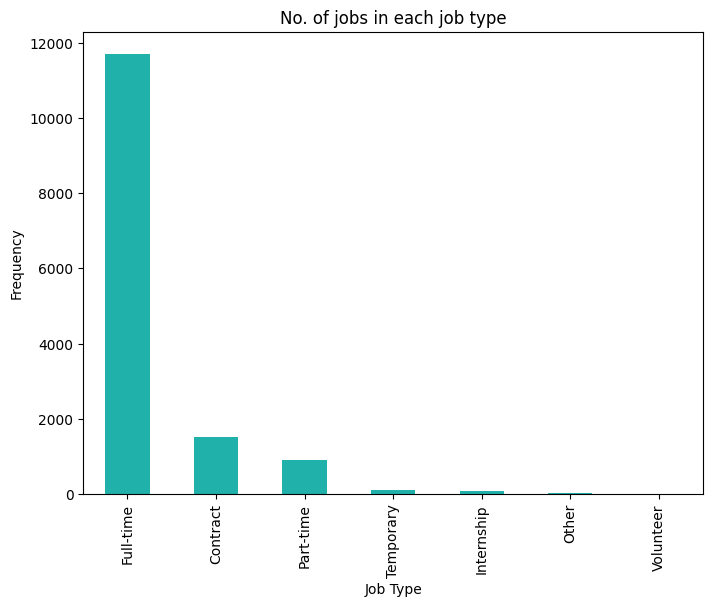

In [ ]:
barchart= new_data['work_type'].value_counts()
plt.figure(figsize=(8, 6))
barchart.plot(kind='bar', color='lightseagreen')
plt.title('No. of jobs in each job type')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.show()


In the first bar chart representing the LinkedIn dataset, the selected attribute is "Job Type." It's evident that the number of applicants for full-time employment is significantly higher in comparison to all other job types. Following this, we observe that both Contract and Part-time positions have noticeable applicant numbers, with around 1800 for Contract and 1500 for Part-time. Subsequently, Temporary, Internship, and Other job types exhibit relatively lower applicant figures when contrasted with the previously mentioned categories. Lastly, the Volunteer job type registers an almost negligible presence.

## Pie Chart 1

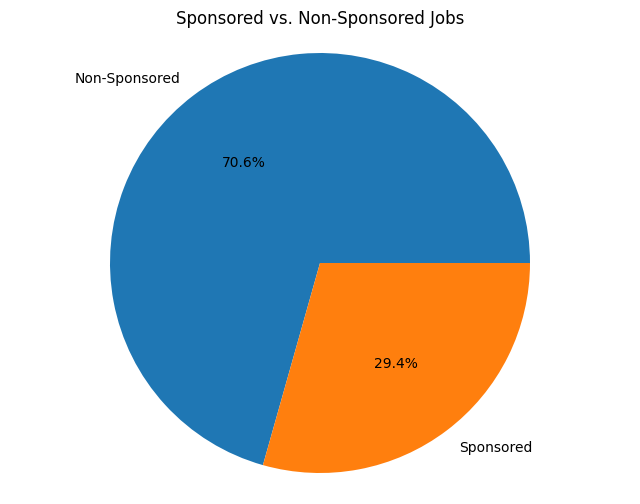

In [ ]:
pie_chart = new_data['sponsored'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(pie_chart, labels=['Non-Sponsored', 'Sponsored'], autopct='%1.1f%%')
plt.title('Sponsored vs. Non-Sponsored Jobs')
plt.axis('equal')
plt.show()

In this section, we have presented a Pie Chart that depicts the "Sponsored" attribute. It's evident that the number of Non-Sponsored jobs is considerably higher when compared to the number of Sponsored jobs, with 70.6% of the jobs being Non-Sponsored, while only 29.4% are Sponsored.

## Scatter Plot

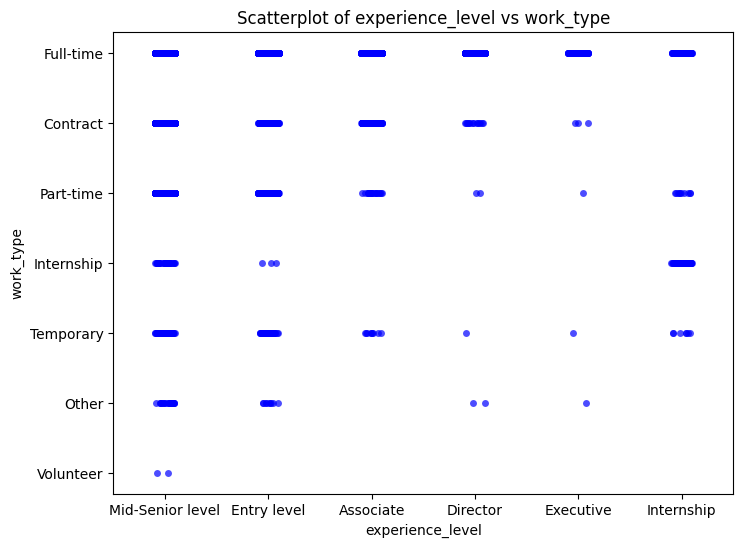

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(x=new_data['experience_level'], y=new_data['work_type'], jitter=True, color='blue', alpha=0.7)
plt.title('Scatterplot of experience_level vs work_type')
plt.xlabel('experience_level')
plt.ylabel('work_type')
plt.show()

The preceding scatterplot illustrates the relationship between experience level and work type. It is observed that for the Full-time work type, there is an even distribution across all experience levels. Similarly, the Contract work type follows a similar distribution pattern, although it lacks internship opportunities and exhibits fewer positions in the executive field. On the other hand, Part-time work type shows a lower number of job opportunities in the directive and executive categories compared to the other experience levels.

Regarding the Internship work type, we can see a relatively even distribution across Mid-Senior Level and Internship, while Entry Level displays a more typical bell-shaped distribution. However, there are no opportunities for all the other experience levels in this category.

Moving on to the Temporary work type, we notice that Mid-Senior and Entry levels have a high number of opportunities, with Associate and Internship also showing significant figures, but there are very few positions for Director and Executive experience levels.

For the Other work type, there is a high number of Mid-Senior level opportunities, a good number in Entry level, but only a few for Director and Executive roles, with none available for Associate and Internship levels.

In the case of the Volunteer work type, there are very few opportunities in the Mid-Senior level, and no positions are available for all the other experience levels.

## Pie Chart 2

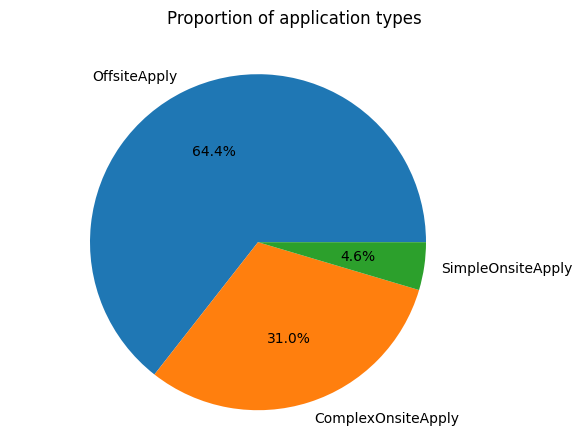

In [ ]:
app_types = new_data['application_type'].value_counts()
plt.pie(app_types, labels=app_types.index, autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle('Proportion of application types',x=0.57)
plt.show()

In this section, we present a Pie Chart that represents the "Proportion of Application Types" attribute. OffsiteApply accounts for the highest percentage at 64.4% compared to the other categories. ComplexOnsiteApply follows at 31.0%, and SimpleOnsiteApply is the least, making up 4.6% of the total.

# Bar Plot 2

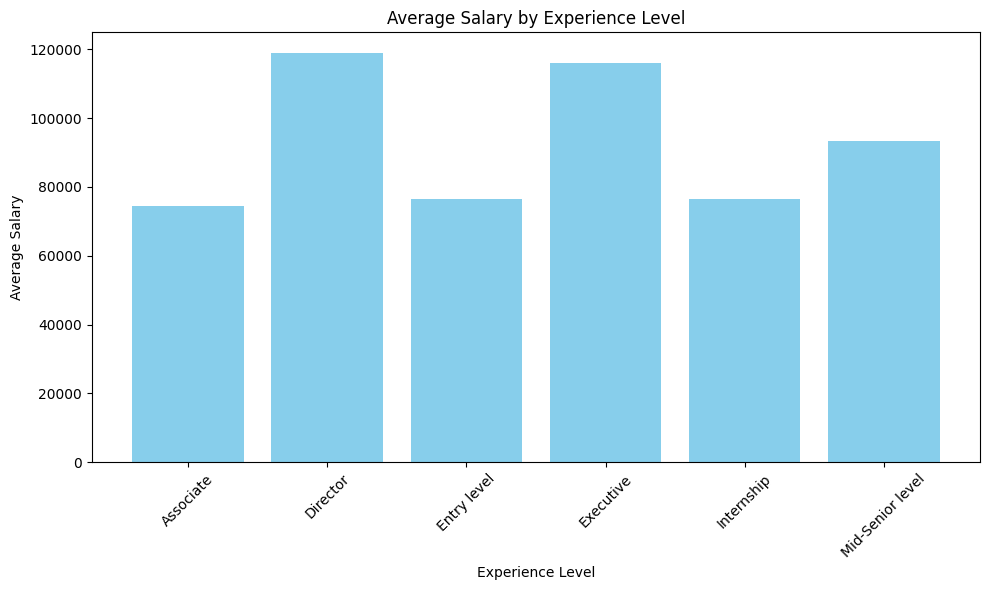

In [ ]:
avg_salary_by_experience = new_data.groupby('experience_level')['salary'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_salary_by_experience.index, avg_salary_by_experience.values, color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()

The above bar chart represents the avergae salary of the jobs posting based upon the different experience levels. The director bar is the talles one and hence the director level experince are getting more salary followed by executives. Since our data is less focused on salary field from the above chart we can see the internship, entry level and associate level jobs are almost equally paid.

## Word Cloud

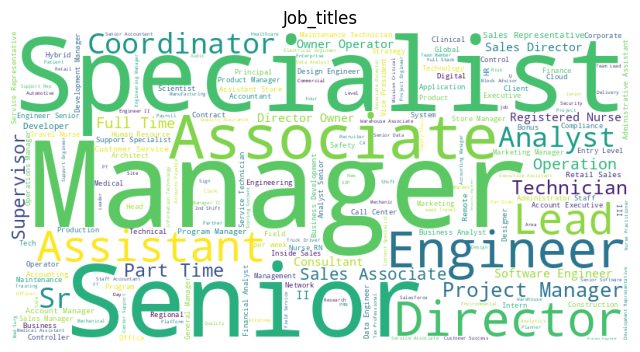

In [ ]:
from wordcloud import WordCloud
job_title = ' '.join(new_data['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_title)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.title('Job_titles')
plt.axis('off')
plt.show()

The above visualization is known as wordcloud. wordclouds are great for visualizing data and getting insights on trends and pattern with categorical names.The above wordcloud is on job titles the data set having. The larger the word represents the more frequency of the job titles.

## Bar Plot 3

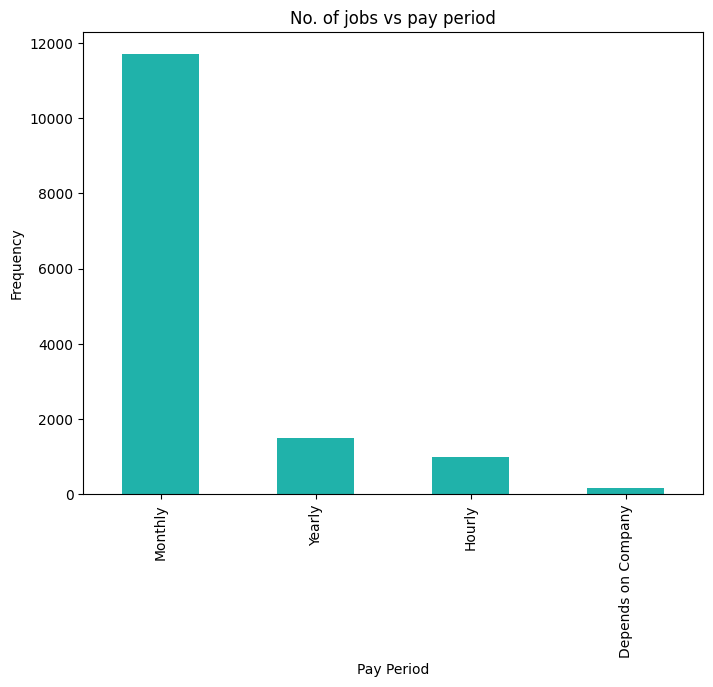

In [ ]:
barchart= new_data['pay_period'].value_counts()
plt.figure(figsize=(8, 6))
barchart.plot(kind='bar', color='lightseagreen')
plt.title('No. of jobs vs pay period')
plt.xlabel('Pay Period')
plt.ylabel('Frequency')
plt.show()

This above bar chart is used to visualize the distribution of job counts across different pay periods, making it easier to compare the frequency of jobs in each pay period category. We can obswerve that he count of no of jobs who are getting paid monthly are high compare to the jobs getting salary per year and hourly.

## Heat Map

<ipython-input-60-4a93f4174c42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(encd_data.corr(),annot=True)


<Axes: >

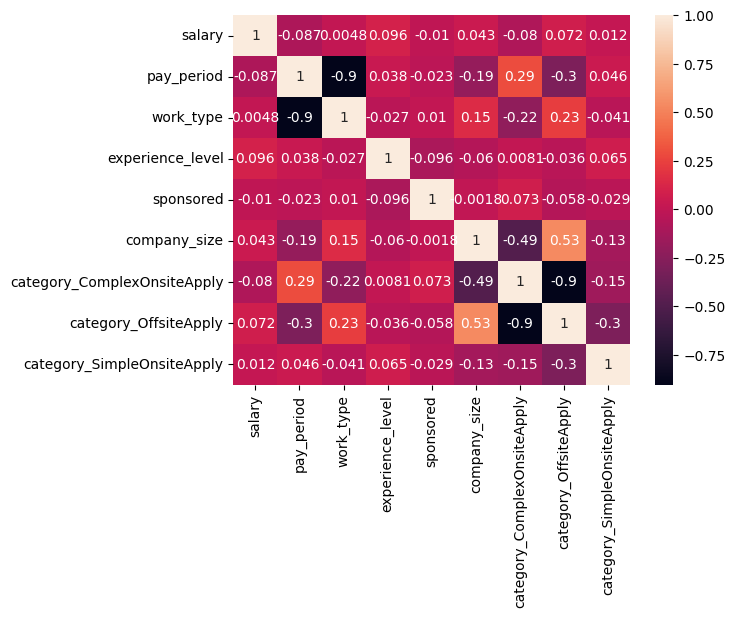

In [ ]:
sns.heatmap(encd_data.corr(),annot=True)

The heatmap is a useful visualization for understanding the relationships between features, as it highlights which features are strongly correlated and which are not. Positive correlations are typically shown in warmer colors, while negative correlations are represented by cooler colors. In the heat map company size and Offsite applications are having more positive correlation than others.

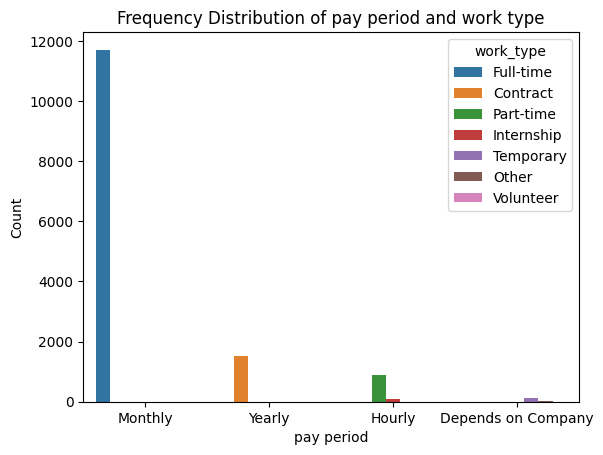

In [ ]:
sns.countplot(x='pay_period', hue='work_type', data=new_data)
plt.title('Frequency Distribution of pay period and work type')
plt.xlabel('pay period')
plt.ylabel('Count')
plt.show()

The countplot helps you understand how different work types are distributed within various pay period categories, providing insights into the dataset's composition. Here we can observe from the frequency distributin of pay period and work type that Full-Time worktype has a huge count value when comapred to other works types

## Pie Chart 3

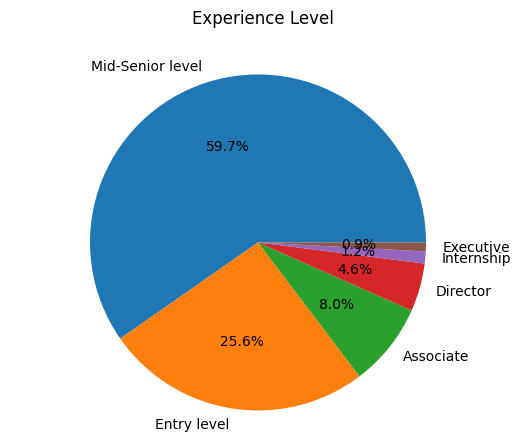

In [ ]:
exp_lvls = new_data['experience_level'].value_counts()
plt.pie(exp_lvls, labels=exp_lvls.index, autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle('Experience Level',x=0.52)
plt.show()

 The above pie chart is used to represent the the different experience categories and amount of each experience level in percentages. We can easily say thta the Mid-Senior level job postings are more than half with 59.7%. And then followed by Entry level jobs eith 1/4th of the data that is 25.6%. The Associate level jobs are of 8% and Director level experience jobs are 4.6%. The Executive and Internship level experience jobs are least among all with 0.9% and 1.2% respectively.

# Saving the cleaned data into .npz format.

In [ ]:
np.savez('Group_9_Clean_Data.npz', encd_data.to_numpy())

# Saving the dataset to import into SQl Workbench.

In [ ]:
sql_data = encd_data[['salary','pay_period','work_type','location','experience_level','sponsored','currency','skills','company_size','category_ComplexOnsiteApply','category_OffsiteApply','category_SimpleOnsiteApply']]

In [ ]:
sql_data

,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
1,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",1.0,1,0,0
2,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",1.0,1,0,0
4,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",1.0,1,0,0
5,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,2.0,1,0,0
6,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15881,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",5.0,0,1,0
15882,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,5.0,0,1,0
15883,88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,5.0,0,1,0
15884,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,7.0,0,1,0


In [ ]:
sql_data.to_csv('data_for_sql.csv', index=False)

In [ ]:
encd_data

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
1,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
2,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
4,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
5,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
6,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
15882,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
15883,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
15884,MRI Manager,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


In [ ]:
csv_file_path = '/cleaned_data.csv'

In [ ]:
encd_data.to_csv(csv_file_path, index=False)

NameError: ignored

# PAHSE 2

# 1. Simple Linear Regression

## Since we are predicting the variable "salary" which is a continuous value we use Linear Regression.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = encd_data[['salary','pay_period','work_type','experience_level','sponsored','company_size','category_ComplexOnsiteApply','category_OffsiteApply','category_SimpleOnsiteApply']]

In [ ]:
corr_matrix = np.round(df.corr(), 2)
corr_matrix

,salary,pay_period,work_type,experience_level,sponsored,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
salary,1.00,-0.09,0.00,0.10,-0.01,0.04,-0.08,0.07,0.01
pay_period,-0.09,1.00,-0.90,0.04,-0.02,-0.19,0.29,-0.30,0.05
work_type,0.00,-0.90,1.00,-0.03,0.01,0.15,-0.22,0.23,-0.04
experience_level,0.10,0.04,-0.03,1.00,-0.10,-0.06,0.01,-0.04,0.06
sponsored,-0.01,-0.02,0.01,-0.10,1.00,-0.00,0.07,-0.06,-0.03
company_size,0.04,-0.19,0.15,-0.06,-0.00,1.00,-0.49,0.53,-0.13
category_ComplexOnsiteApply,-0.08,0.29,-0.22,0.01,0.07,-0.49,1.00,-0.90,-0.15
category_OffsiteApply,0.07,-0.30,0.23,-0.04,-0.06,0.53,-0.90,1.00,-0.30
category_SimpleOnsiteApply,0.01,0.05,-0.04,0.06,-0.03,-0.13,-0.15,-0.30,1.00


<Axes: >

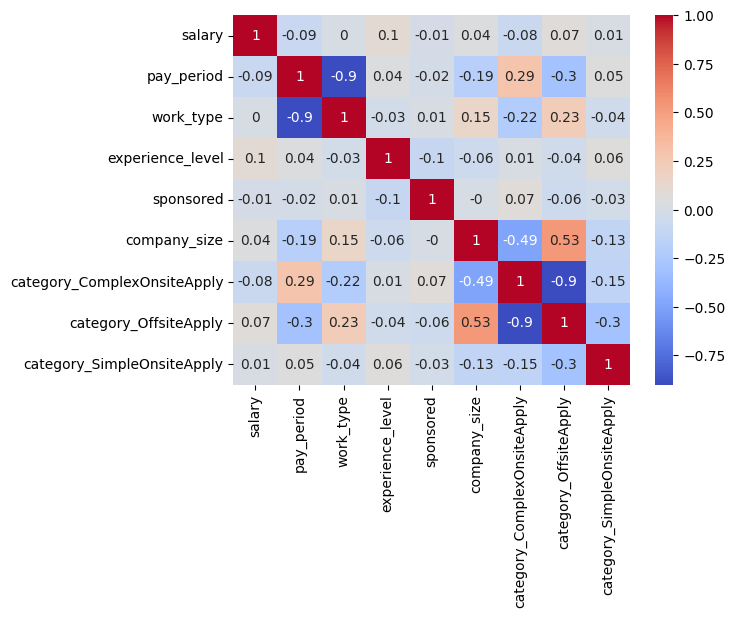

In [ ]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")

##Based on the correlation coefficients, we choose to create a linear regression model to predict "Salary" based on "Experience Level".

## Here, In this Linear Regression model we are predicting 'salary' which is our target variable (output or dependent variable) using the feature 'experience_level' (input or independent variable). process of creating and training the model is followed in the code with comments.

In [ ]:
X = df['experience_level'] # Feature
y = df['salary']           # Target Variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## With the help of sklearn train_test_split we splitted the dataset into two parst train set and test set. So, total 14343 rows are splitted into two sets where 11474 in train set and remaining 2869 in test set.

In [ ]:
X_train.shape

(11474,)

In [ ]:
X_test.shape

(2869,)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [ ]:
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

## Scaling is done using StandardScaler which is z-score. Scaling is one of the important process in Ml applications to perform so that the model has higher acccuracy.

## Scaled values of both X_train and X_test

In [ ]:
X_train

array([[ 0.77935155],
       [ 0.77935155],
       [ 0.77935155],
       ...,
       [ 0.77935155],
       [ 0.77935155],
       [-0.90026522]])

In [ ]:
X_test

array([[-0.90026522],
       [ 0.77935155],
       [ 0.77935155],
       ...,
       [ 0.77935155],
       [-2.02000972],
       [-1.46013747]])

## Now, Lets start building different models on our cleaned dataset and observe how the performances are and with the help of metrics we can decicde which model has better performance compared to all the models built.

In [ ]:
y_train

array([[-0.01236833],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [ 0.93892532],
       [-0.01236833]])

In [ ]:
y_test

array([[-0.01236833],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [-0.01236833],
       [-0.01236833]])

In [ ]:
#Importing the LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating the model
linear_reg_model = LinearRegression()
# Training the model which is called fitting
linear_reg_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
print(f'Mean Squared Error (Linear Regression): {mse_linear_reg}')

Mean Squared Error (Linear Regression): 0.7932645167106496


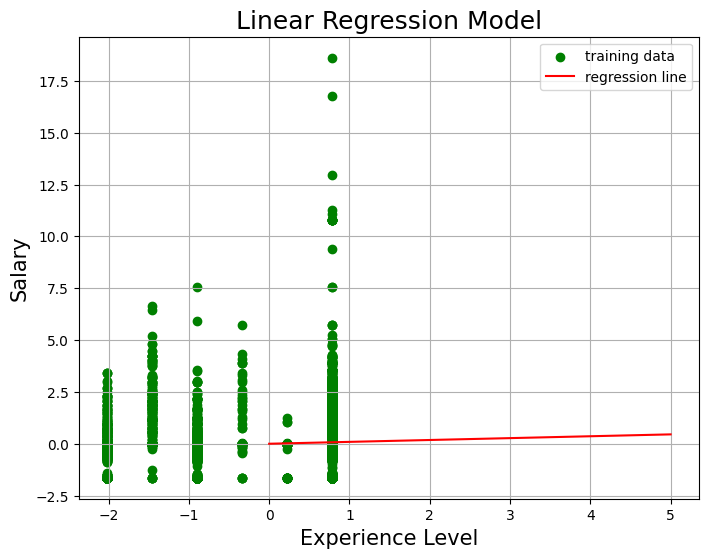

In [ ]:
#Scatter plot of trainign data of Salary with respect to Experience Level
domain = np.linspace(X.min(), X.max(), 100)

plt.figure(figsize = (8, 6))

plt.scatter(X_train, y_train, color='green', label='training data')
plt.plot(domain, linear_reg_model.predict(domain.reshape(-1,1)), color="red", label ="regression line")
plt.title('Linear Regression Model', fontsize=18)
plt.xlabel('Experience Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.legend()
plt.grid();

# K-NEAREST NEIGHBOURS (KNN)

## We know that KNN is a Supervised Machine Learning algorith used for both classification and regression. As our problem is Regression based we use KNN Regressor from sklearn.

## In KNN the hyper parameter is K. Hyper parameters are the parameters that are manually given by the programmers. We can use the K value on our own based on the features. Here we performed KNN by setting K value as 5.

In [ ]:
#Importing the LinearRegression from sklearn library
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Training the model which is called fitting
knn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'Mean Squared Error (KNN): {mse_knn}')

Mean Squared Error (KNN): 0.889415666574931


# RANDOM FOREST

## Random Forest is also a Supervised Machine Learning algorithm used for both Regression and Classification. As our problem is Regression based we use RandomForestRegressor from sklearn.

In [ ]:
#Importing the RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating the model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_random_forest = random_forest_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print(f'Mean Squared Error (Random Forest): {mse_random_forest}')

<ipython-input-312-417334f982dc>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


Mean Squared Error (Random Forest): 0.7664392913856127


# SUPPORT VECTOR MACHINE With Linear Kernel

In [ ]:
#Importing the svm from sklearn library
from sklearn.svm import LinearSVR

# Creating the model
linear_svm_model = LinearSVR()

# Training the model which is called fitting
linear_svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear_svm = linear_svm_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_linear_svm = mean_squared_error(y_test, y_pred_linear_svm)
print(f'Mean Squared Error (Linear SVM): {mse_linear_svm}')

Mean Squared Error (Linear SVM): 0.8038723315652917


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SUPPORT VECTOR MACHINE With nonLinear Kernel = Gaussian RBF

In [ ]:
#Importing the svm from sklearn library
from sklearn.svm import SVR

# Creating the model
nonlinear_svm_model = SVR(kernel='rbf')

# Training the model which is called fitting
nonlinear_svm_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_linear_svm = nonlinear_svm_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_linear_svm = mean_squared_error(y_test, y_pred_linear_svm)
print(f'Mean Squared Error (Linear SVM): {mse_linear_svm}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (Linear SVM): 0.7824933220946233


# GRADIENT BOOSTING

## Gradient Boosting is an ensemble method used for both Regression and Classifictaion problems. As mentioned in earlier cases, our problem is a Regression based approach we use GradientBoostingRegressor.

In [ ]:
#Importing the ensemble GradientBoostingRegressor from sklearn library
from sklearn.ensemble import GradientBoostingRegressor

# Creating the model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
gradient_boosting_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Finding the Mean Squared Error of the model to know the performance.
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
print(f'Mean Squared Error (Gradient Boosting): {mse_gradient_boosting}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error (Gradient Boosting): 0.7662591733104306


Que 5

XGBoost

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model to the training data
xg_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ELM

In [ ]:
elm = ELMRegressor(n_hidden=100, activation_func='sigmoid', alpha=0.1)

# Fit the model to the training data
elm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elm.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Neural Network with 2 layers

In [ ]:
# Build a basic neural network with two layers
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Ensemble model containing the top 3 models overall.

In [ ]:
# Train Extreme Learning Machine model
elm = ELMRegressor(n_hidden=100, activation_func='sigmoid', alpha=0.1)
elm.fit(X_train, y_train)

# Train a basic deep learning model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions with each model
y_pred_xg = xg_reg.predict(X_test)
y_pred_elm = elm.predict(X_test)
y_pred_dl = model.predict(X_test)

# Combine predictions by averaging
ensemble_pred = np.mean([y_pred_xg, y_pred_elm, y_pred_dl], axis=0)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, ensemble_pred)
print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')